# 1. Defining Paths

In [50]:
from pathlib import Path
import os
import sys
sys.path.append(str(Path(os.getcwd()).resolve().parent))

PROJECT_PATH = Path(os.getcwd()).resolve().parent
DATA_DIR = PROJECT_PATH / 'data'
CAPUCHINBIRD_DIR = DATA_DIR / 'Parsed_Capuchinbird_Clips'
NOT_CAPUCHINBIRD_DIR = DATA_DIR / 'Parsed_Not_Capuchinbird_Clips'

# 2. Loading DataFrames

In [51]:
from scripts.data_loading import load_audio_filepaths

CAPUCHINBIRD_DF = load_audio_filepaths(CAPUCHINBIRD_DIR)
NOT_CAPUCHINBIRD_DF = load_audio_filepaths(NOT_CAPUCHINBIRD_DIR)

In [52]:
CAPUCHINBIRD_DF

filename                                           filepath
0    XC114131-0.wav  C:\Users\miki0\Desktop\Projects\Audio\Capuchin...
1    XC114131-1.wav  C:\Users\miki0\Desktop\Projects\Audio\Capuchin...
2    XC114131-2.wav  C:\Users\miki0\Desktop\Projects\Audio\Capuchin...
3    XC114131-3.wav  C:\Users\miki0\Desktop\Projects\Audio\Capuchin...
4    XC114131-4.wav  C:\Users\miki0\Desktop\Projects\Audio\Capuchin...
..              ...                                                ...
212    XC9221-1.wav  C:\Users\miki0\Desktop\Projects\Audio\Capuchin...
213    XC9221-2.wav  C:\Users\miki0\Desktop\Projects\Audio\Capuchin...
214   XC98557-0.wav  C:\Users\miki0\Desktop\Projects\Audio\Capuchin...
215   XC98557-1.wav  C:\Users\miki0\Desktop\Projects\Audio\Capuchin...
216    XC9892-0.wav  C:\Users\miki0\Desktop\Projects\Audio\Capuchin...

[217 rows x 2 columns]

# 3. Plot One Sample from Capuchinbirg and Not Capuchinbird

## 3.1 Loading Audio Function

In [53]:
import librosa
import numpy as np

def load_wav_24k_mono(filepath: str) -> np.ndarray:
    wav, sr = librosa.load(filepath, sr=24000, mono=True)

    return wav

## 3.2 Selecing Samples

In [54]:
cap_file = CAPUCHINBIRD_DF.iloc[10]['filepath']
n_cap_file = NOT_CAPUCHINBIRD_DF.iloc[10]['filepath']

In [55]:
from IPython.display import Audio

print('CAPUCHINBIRD')
Audio(cap_file)

CAPUCHINBIRD


In [56]:
print('Not Capuchinbird')
Audio(n_cap_file)

Not Capuchinbird


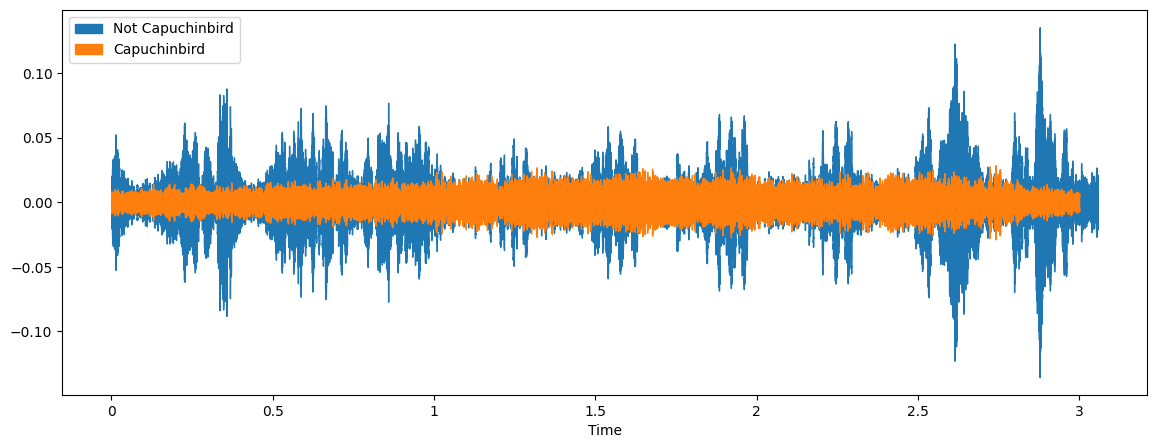

In [57]:
import matplotlib.pyplot as plt

cap_wav = load_wav_24k_mono(cap_file)
n_cap_wav = load_wav_24k_mono(n_cap_file)

plt.figure(figsize=(14, 5))
librosa.display.waveshow(n_cap_wav, sr=24e3, label='Not Capuchinbird')
librosa.display.waveshow(cap_wav, sr=24e3, label='Capuchinbird')
plt.legend()
plt.show()

# 4. Determine Average Length of a Capuchin Call

## 4.1 Calculating Average Wave Cycle Length

In [58]:
def cycle_length(filepath: str) -> int:
    wav = load_wav_24k_mono(filepath)

    return wav.shape[0]

In [59]:
CAPUCHINBIRD_DF['n_samples'] = CAPUCHINBIRD_DF['filepath'].apply(cycle_length)
CAPUCHINBIRD_DF

filename                                           filepath  \
0    XC114131-0.wav  C:\Users\miki0\Desktop\Projects\Audio\Capuchin...   
1    XC114131-1.wav  C:\Users\miki0\Desktop\Projects\Audio\Capuchin...   
2    XC114131-2.wav  C:\Users\miki0\Desktop\Projects\Audio\Capuchin...   
3    XC114131-3.wav  C:\Users\miki0\Desktop\Projects\Audio\Capuchin...   
4    XC114131-4.wav  C:\Users\miki0\Desktop\Projects\Audio\Capuchin...   
..              ...                                                ...   
212    XC9221-1.wav  C:\Users\miki0\Desktop\Projects\Audio\Capuchin...   
213    XC9221-2.wav  C:\Users\miki0\Desktop\Projects\Audio\Capuchin...   
214   XC98557-0.wav  C:\Users\miki0\Desktop\Projects\Audio\Capuchin...   
215   XC98557-1.wav  C:\Users\miki0\Desktop\Projects\Audio\Capuchin...   
216    XC9892-0.wav  C:\Users\miki0\Desktop\Projects\Audio\Capuchin...   

     n_samples  
0        60000  
1        72000  
2        84000  
3        72000  
4        84000  
..         ...  
212      96001  
213      84001  
214      96001  
215      96001  
216      84001  

[217 rows x 3 columns]

In [60]:
CAPUCHINBIRD_DF['n_samples'].describe()

count       217.000000
mean      81235.414747
std       12287.795046
min       48000.000000
25%       72000.000000
50%       84000.000000
75%       84001.000000
max      120001.000000
Name: n_samples, dtype: float64

In [61]:
N_SAMPLES = 72000

def fix_audio_length(wav: np.ndarray) -> np.ndarray:
    wav = wav[:N_SAMPLES]
    zero_padding = np.zeros(N_SAMPLES - wav.shape[0], dtype=np.float32)
    wav = np.concatenate((wav, zero_padding))

    return wav

# 5. Visualize Spectograms

In [82]:
def get_spectogram(wav: np.ndarray, expand_dims: bool=False) -> np.ndarray:
    spectogram = librosa.stft(wav, n_fft=512, hop_length=128)
    if expand_dims:
        spectogram = np.expand_dims(spectogram, axis=2)
    
    return spectogram

In [128]:
random_idx = np.random.choice(CAPUCHINBIRD_DF.index, 6, replace=False)
capuchin_10_samples = CAPUCHINBIRD_DF.iloc[random_idx]
random_idx = np.random.choice(NOT_CAPUCHINBIRD_DF.index, 6, replace=False)
not_capuchin_10_samples = NOT_CAPUCHINBIRD_DF.iloc[random_idx]

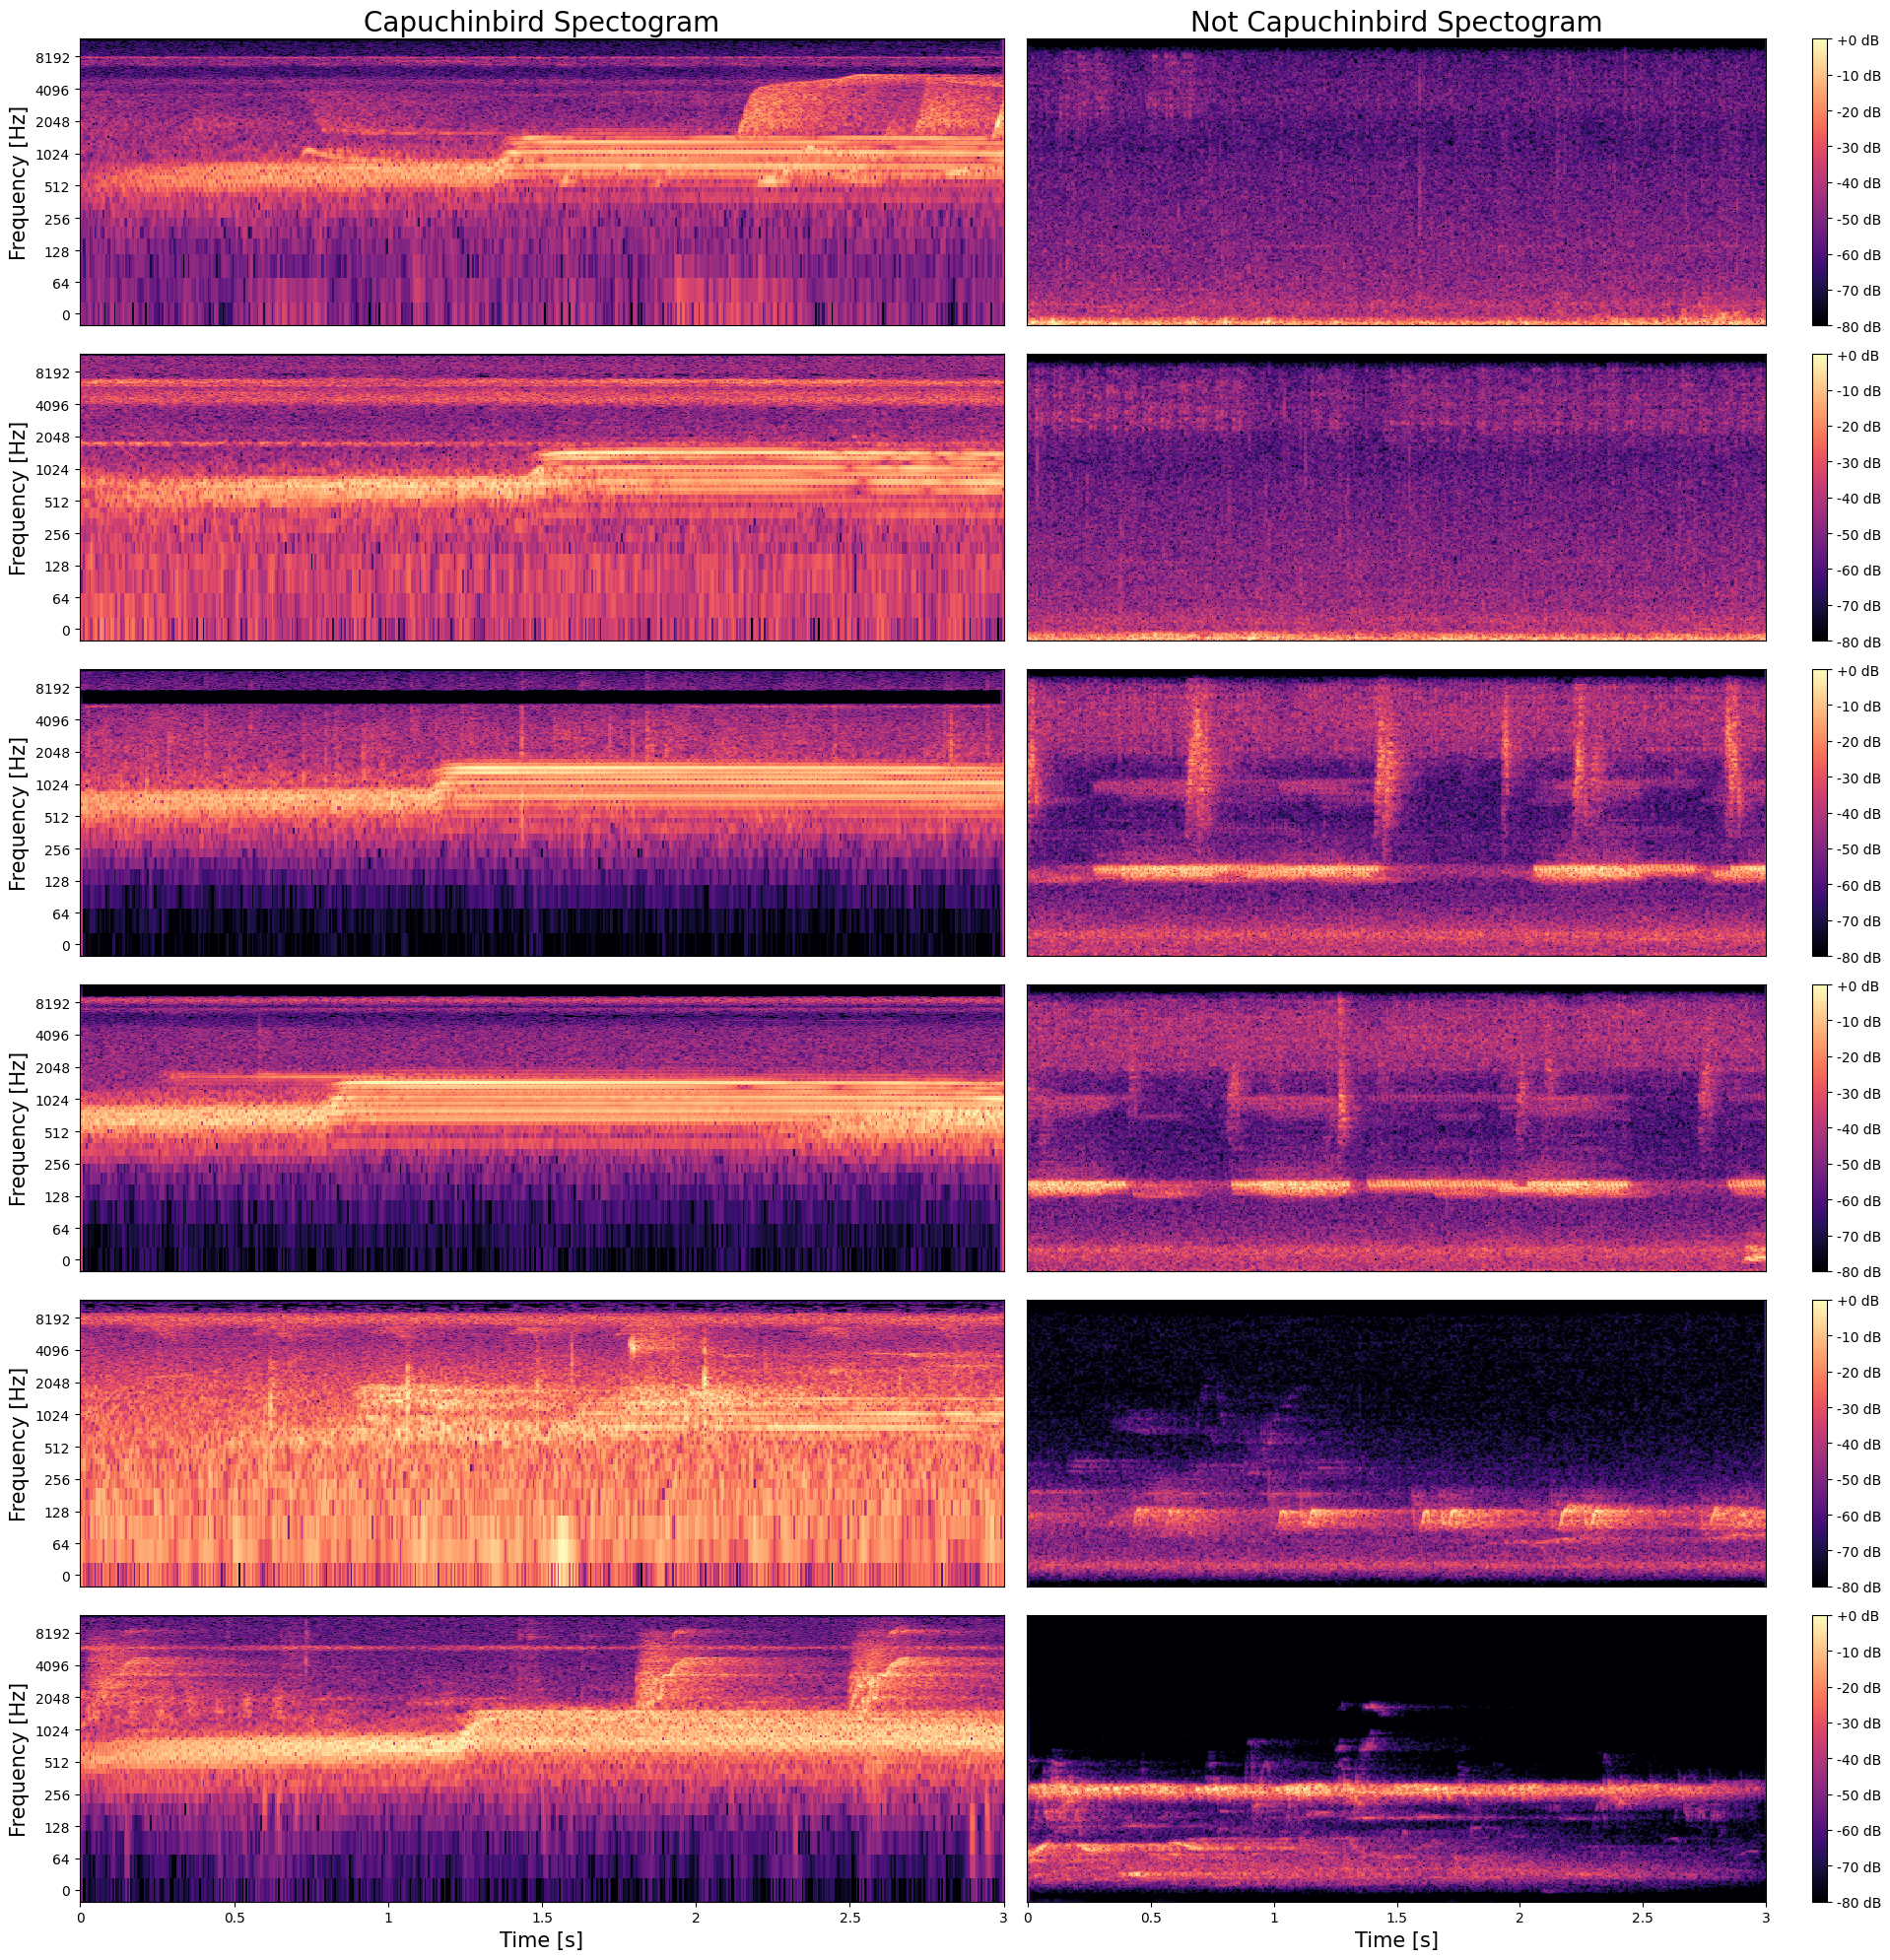

In [144]:
nrows = 6
ncols = 2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 20))
axes = axes.flatten()

for idx, (capuchin_filepath, not_capuchin_filepath) in enumerate(zip(capuchin_10_samples['filepath'], not_capuchin_10_samples['filepath'])):
    wav_cap = load_wav_24k_mono(capuchin_filepath)
    wav_not = load_wav_24k_mono(not_capuchin_filepath)

    wav_cap = fix_audio_length(wav_cap)
    wav_not = fix_audio_length(wav_not)

    spec_cap = np.abs(get_spectogram(wav_cap))
    spec_not = np.abs(get_spectogram(wav_not))

    spec_cap_db = librosa.amplitude_to_db(spec_cap, ref=np.max)
    spec_not_db = librosa.amplitude_to_db(spec_not, ref=np.max)

    idx_cap = 2 * idx
    idx_not = (2 * idx) + 1

    if idx != nrows-1:
        librosa.display.specshow(data=spec_cap_db, sr=24000, y_axis='log', hop_length=128, ax=axes[idx_cap])
        img = librosa.display.specshow(data=spec_not_db, sr=24000, hop_length=128, ax=axes[idx_not])

        plt.colorbar(img, format='%+2.0f dB', ax=axes[idx_not])
        axes[idx_cap].set_ylabel('Frequency [Hz]', fontsize=15)

    if idx == 0:
        axes[idx_cap].set_title('Capuchinbird Spectogram', fontsize=20)
        axes[idx_not].set_title('Not Capuchinbird Spectogram', fontsize=20)

    if idx == nrows-1:
        librosa.display.specshow(data=spec_cap_db, y_axis='log', x_axis='time', sr=24000, hop_length=128, ax=axes[idx_cap])
        img = librosa.display.specshow(data=spec_not_db, x_axis='time', sr=24000, hop_length=128, ax=axes[idx_not])

        plt.colorbar(img, format='%+2.0f dB', ax=axes[idx_not])
        axes[idx_cap].set_ylabel('Frequency [Hz]', fontsize=15)

        axes[idx_cap].set_xlabel('Time [s]', fontsize=15)
        axes[idx_not].set_xlabel('Time [s]', fontsize=15)


plt.tight_layout()
plt.show()

# 5. Visualize Mel-Spectograms

In [137]:
def get_mel_spectogram(wav: np.ndarray, expand_dims: bool=False) -> np.ndarray:
    mel_spectogram = librosa.feature.melspectrogram(y=wav, sr=24000, n_fft=512, hop_length=128, n_mels=128)
    if expand_dims:
        mel_spectogram = np.expand_dims(mel_spectogram, axis=2)
    
    return mel_spectogram

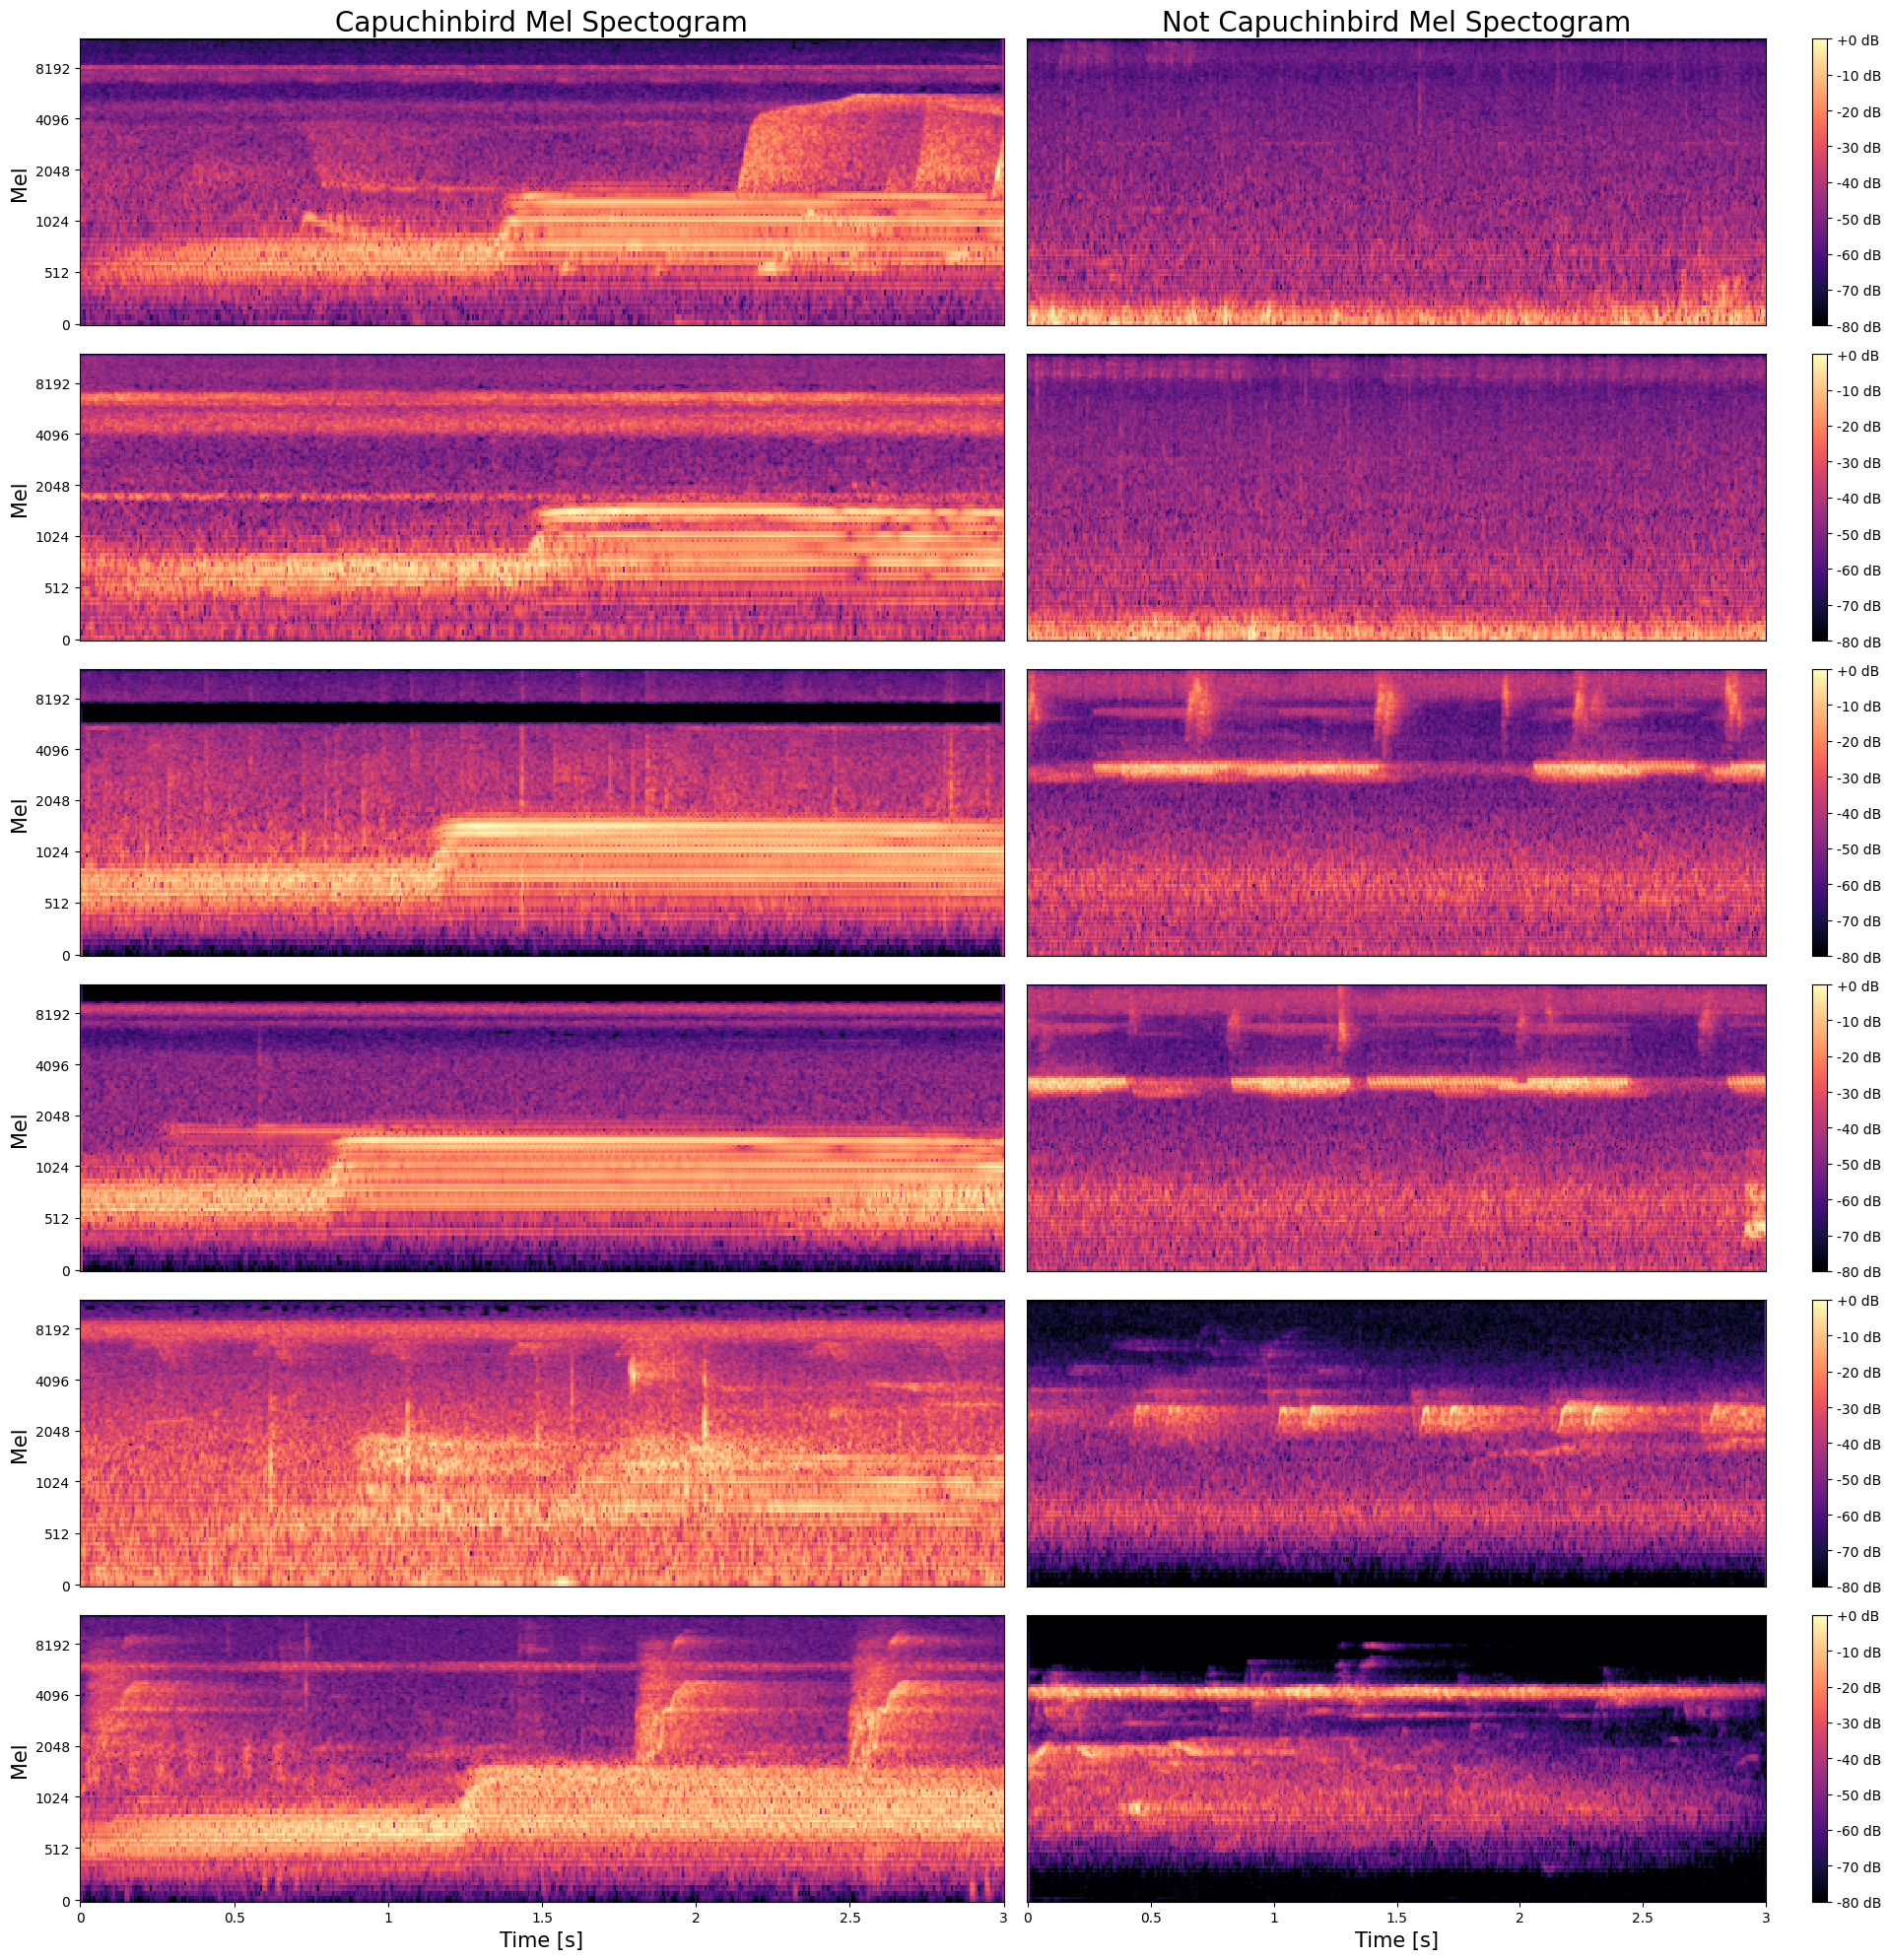

In [149]:
nrows = 6
ncols = 2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 20))
axes = axes.flatten()

for idx, (capuchin_filepath, not_capuchin_filepath) in enumerate(zip(capuchin_10_samples['filepath'], not_capuchin_10_samples['filepath'])):
    wav_cap = load_wav_24k_mono(capuchin_filepath)
    wav_not = load_wav_24k_mono(not_capuchin_filepath)

    wav_cap = fix_audio_length(wav_cap)
    wav_not = fix_audio_length(wav_not)

    mel_spec_cap = get_mel_spectogram(wav_cap)
    mel_spec_not = get_mel_spectogram(wav_not)

    mel_spec_cap_db = librosa.power_to_db(mel_spec_cap, ref=np.max)
    mel_spec_not_db = librosa.power_to_db(mel_spec_not, ref=np.max)

    idx_cap = 2 * idx
    idx_not = (2 * idx) + 1

    if idx != nrows-1:
        librosa.display.specshow(data=mel_spec_cap_db, sr=24000, y_axis='mel', hop_length=128, ax=axes[idx_cap])
        img = librosa.display.specshow(data=mel_spec_not_db, sr=24000, hop_length=128, ax=axes[idx_not])

        plt.colorbar(img, format='%+2.0f dB', ax=axes[idx_not])
        axes[idx_cap].set_ylabel('Mel', fontsize=15)

    if idx == 0:
        axes[idx_cap].set_title('Capuchinbird Mel Spectogram', fontsize=20)
        axes[idx_not].set_title('Not Capuchinbird Mel Spectogram', fontsize=20)

    if idx == nrows-1:
        librosa.display.specshow(data=mel_spec_cap_db, y_axis='mel', x_axis='time', sr=24000, hop_length=128, ax=axes[idx_cap])
        img = librosa.display.specshow(data=mel_spec_not_db, x_axis='time', sr=24000, hop_length=128, ax=axes[idx_not])

        plt.colorbar(img, format='%+2.0f dB', ax=axes[idx_not])
        axes[idx_cap].set_ylabel('Mel', fontsize=15)

        axes[idx_cap].set_xlabel('Time [s]', fontsize=15)
        axes[idx_not].set_xlabel('Time [s]', fontsize=15)


plt.tight_layout()
plt.show()

# 6. Visualize MFCC

In [159]:
def get_MFCC(wav: np.ndarray, expand_dims: bool=False) -> np.ndarray:
    mfcc = librosa.feature.mfcc(y=wav, sr=24000, n_fft=512, hop_length=128, n_mfcc=20)
    if expand_dims:
        mfcc = np.expand_dims(mfcc, axis=2)
    
    return mfcc

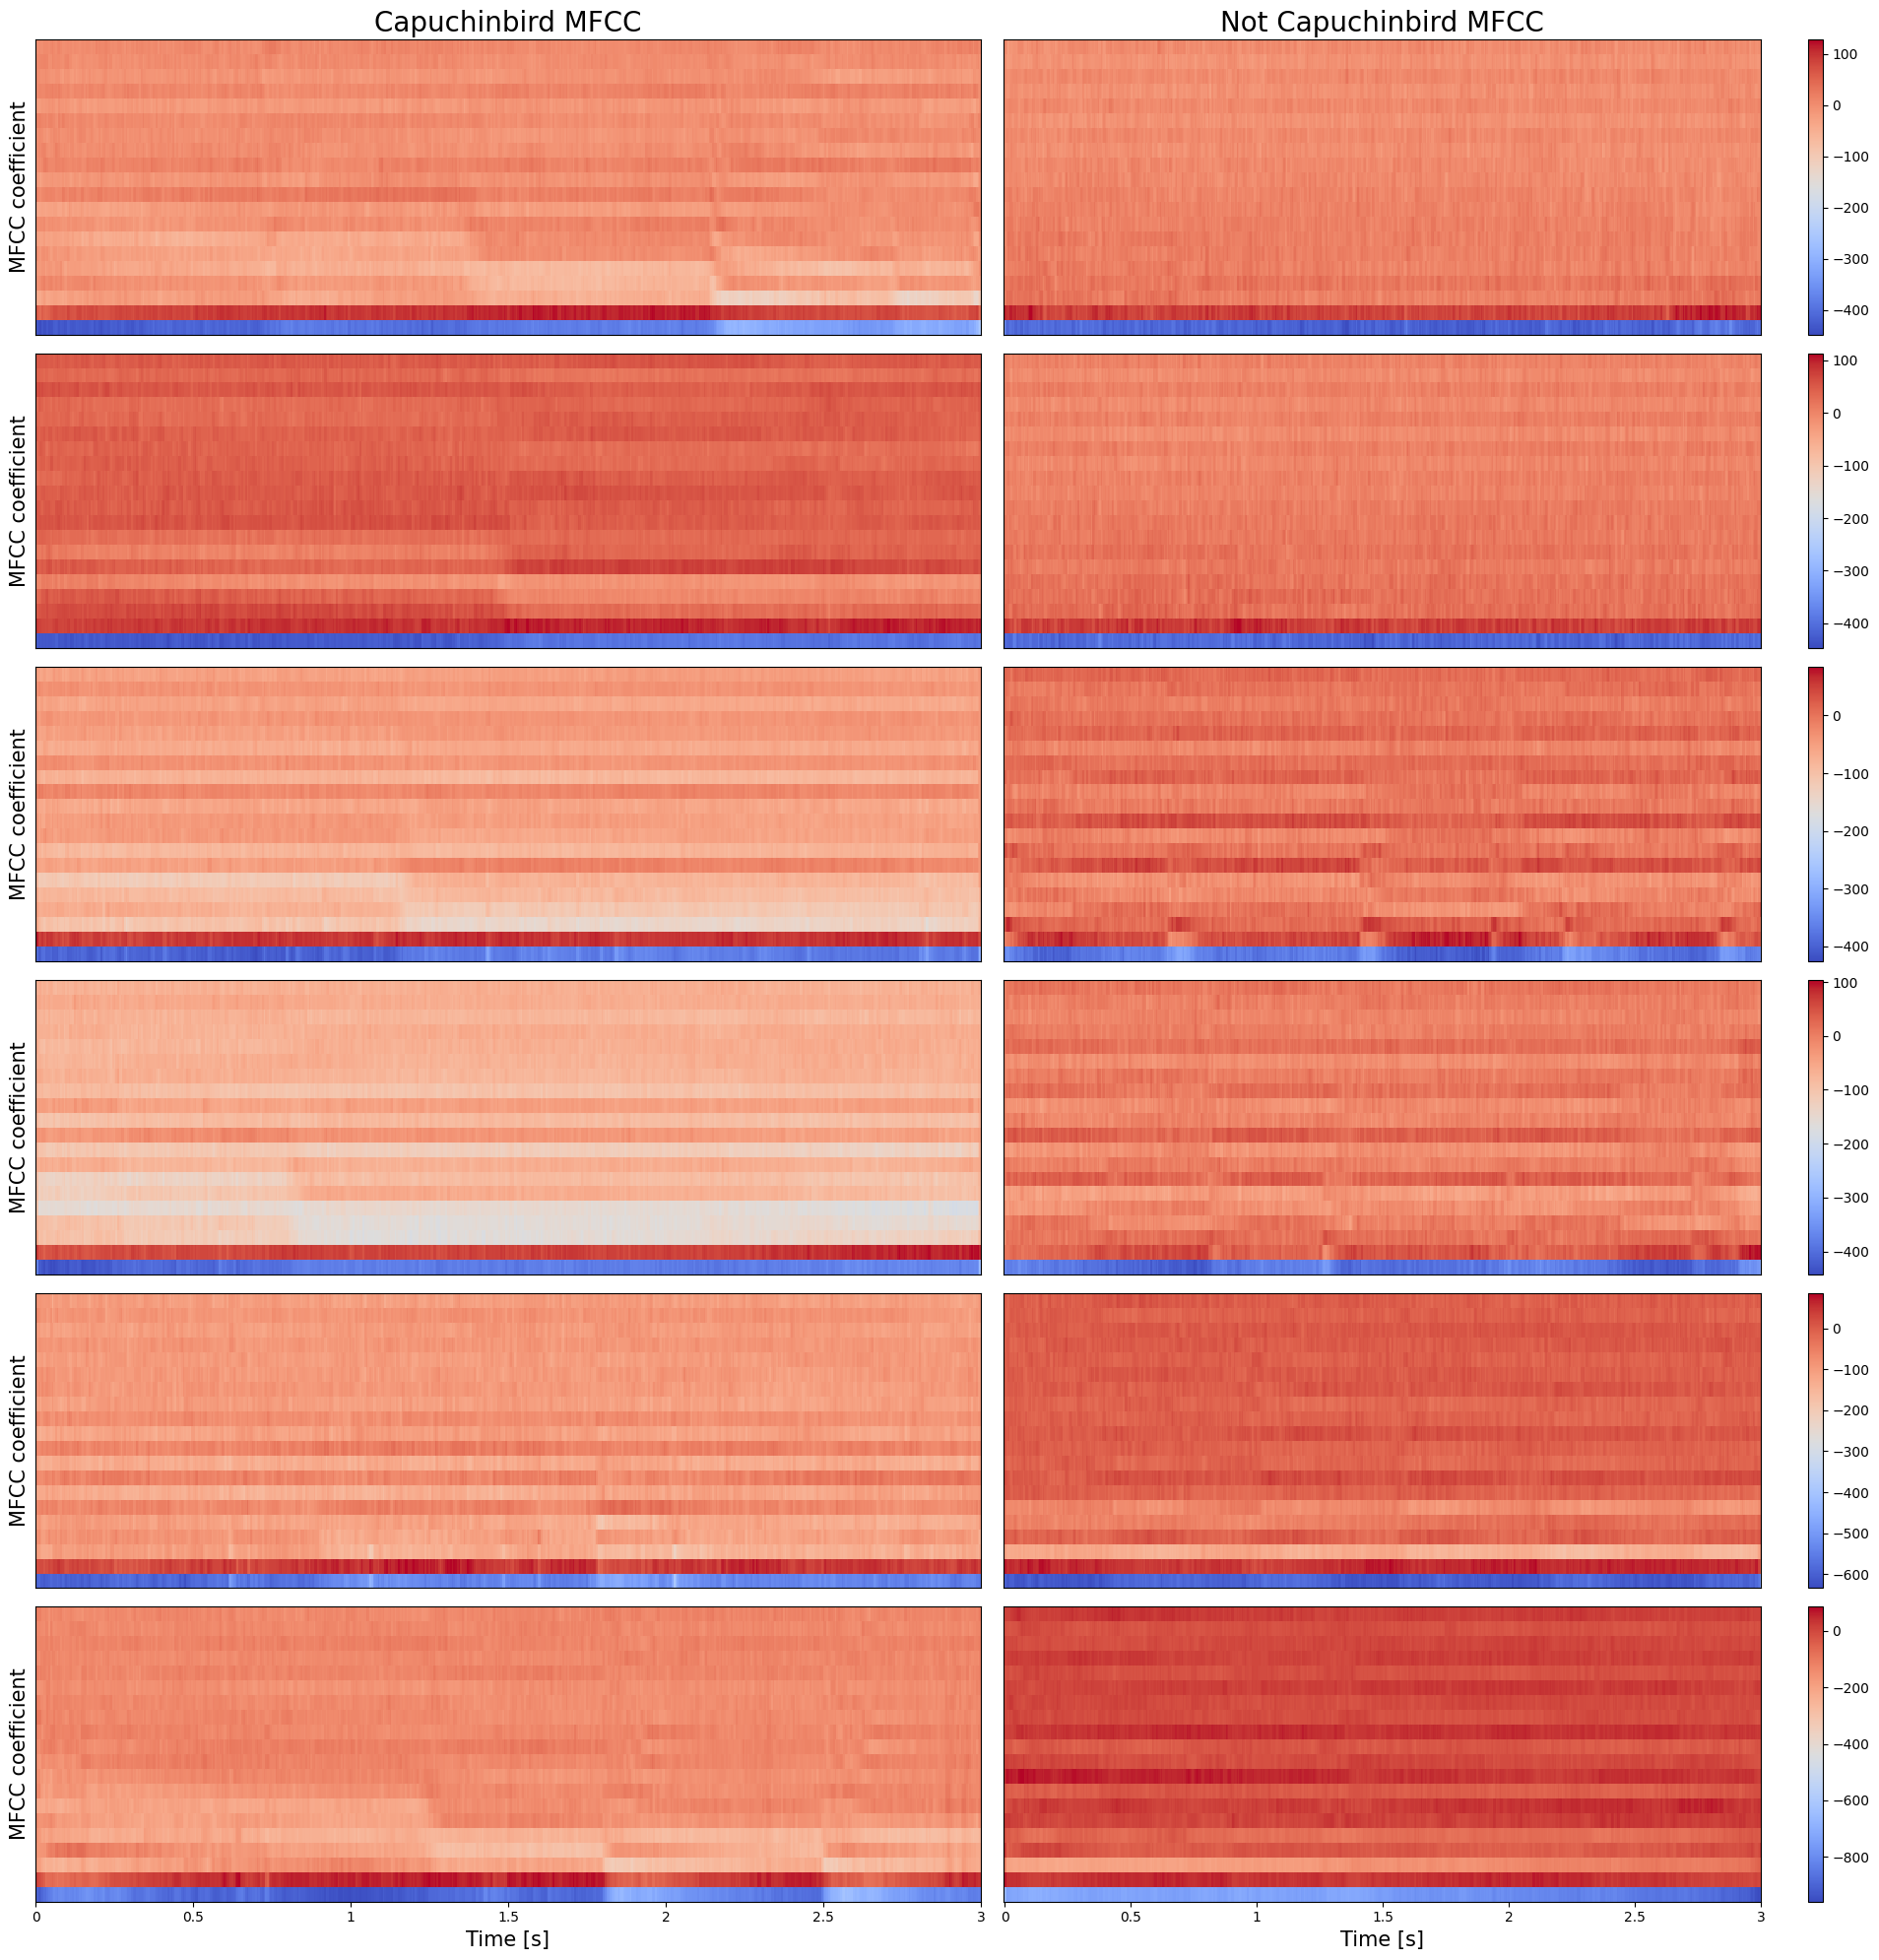

In [160]:
nrows = 6
ncols = 2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 20))
axes = axes.flatten()

for idx, (capuchin_filepath, not_capuchin_filepath) in enumerate(zip(capuchin_10_samples['filepath'], not_capuchin_10_samples['filepath'])):
    wav_cap = load_wav_24k_mono(capuchin_filepath)
    wav_not = load_wav_24k_mono(not_capuchin_filepath)

    wav_cap = fix_audio_length(wav_cap)
    wav_not = fix_audio_length(wav_not)

    MFCC_cap = get_MFCC(wav_cap)
    MFCC_not = get_MFCC(wav_not)

    idx_cap = 2 * idx
    idx_not = (2 * idx) + 1

    if idx != nrows-1:
        librosa.display.specshow(data=MFCC_cap, sr=24000, y_axis=None, hop_length=128, ax=axes[idx_cap])
        img = librosa.display.specshow(data=MFCC_not, sr=24000, hop_length=128, ax=axes[idx_not])

        plt.colorbar(img, ax=axes[idx_not])
        axes[idx_cap].set_ylabel('MFCC coefficient', fontsize=15)

    if idx == 0:
        axes[idx_cap].set_title('Capuchinbird MFCC', fontsize=20)
        axes[idx_not].set_title('Not Capuchinbird MFCC', fontsize=20)

    if idx == nrows-1:
        librosa.display.specshow(data=MFCC_cap, y_axis=None, x_axis='time', sr=24000, hop_length=128, ax=axes[idx_cap])
        img = librosa.display.specshow(data=MFCC_not, x_axis='time', sr=24000, hop_length=128, ax=axes[idx_not])

        plt.colorbar(img, ax=axes[idx_not])
        axes[idx_cap].set_ylabel('MFCC coefficient', fontsize=15)

        axes[idx_cap].set_xlabel('Time [s]', fontsize=15)
        axes[idx_not].set_xlabel('Time [s]', fontsize=15)


plt.tight_layout()
plt.show()